In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import math
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

# import the regressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load your synthetic dataset (replace with your data loading code)
data = pd.read_csv('RFLFSODataFull.csv')
# Handle categorical variable encoding
# Perform one-hot encoding for 'SYNOP Code'
data = pd.get_dummies(data, columns=['SYNOPCode'], prefix='SYNOP')

In [ ]:
data.head

# Predict FSO

In [4]:
fso_data = data.drop("RFL_Att", axis = 1)

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = fso_data.drop('FSO_Att', axis=1).copy()
y = fso_data['FSO_Att']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
fso_actual = y_test.copy()

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a Random Forest Regressor object
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the training and testing data
fso_train_predictions = rf.predict(X_train)
fso_test_predictions = rf.predict(X_test)

# Predict RFL

In [8]:
rfl_data = data.drop("FSO_Att", axis = 1)

In [9]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X2 = rfl_data.drop('RFL_Att', axis=1)
y2 = rfl_data['RFL_Att']

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [10]:
rfl_actual = y2_test.copy()

In [11]:
# Create a Random Forest Regressor object
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model on the training data
rf.fit(X2_train, y2_train)

# Make predictions on the training and testing data
rfl_train_predictions = rf.predict(X2_train)
rfl_test_predictions = rf.predict(X2_test)

## Heatmap for all

In [12]:
data_heatmap_predict = pd.DataFrame({
    'RFL_Att': rfl_test_predictions,
    'FSO_Att': fso_test_predictions
})

In [13]:
data_heatmap_actual = pd.DataFrame({
    'RFL_Att': rfl_actual,
    'FSO_Att': fso_actual
})

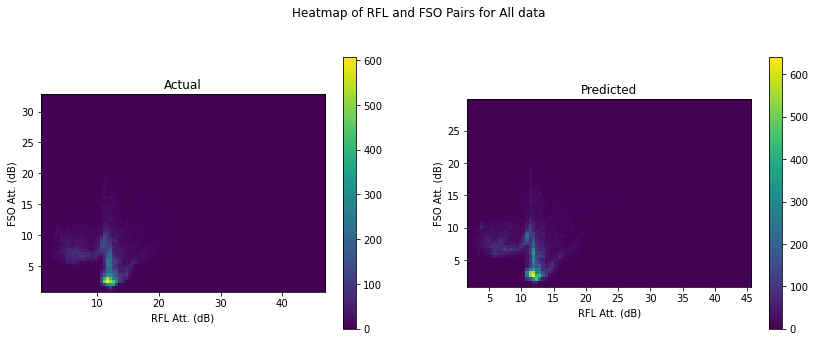

In [14]:
import numpy as np
import matplotlib.pyplot as plt

bin_size = 0.5

# Define the range and bin sizes for both datasets
rfl_range_predict = np.arange(data_heatmap_predict['RFL_Att'].min(), data_heatmap_predict['RFL_Att'].max() + bin_size, bin_size)
fso_range_predict = np.arange(data_heatmap_predict['FSO_Att'].min(), data_heatmap_predict['FSO_Att'].max() + bin_size, bin_size)

rfl_range_actual = np.arange(data_heatmap_actual['RFL_Att'].min(), data_heatmap_actual['RFL_Att'].max() + bin_size, bin_size)
fso_range_actual = np.arange(data_heatmap_actual['FSO_Att'].min(), data_heatmap_actual['FSO_Att'].max() + bin_size, bin_size)
    
# Create 2D histograms for both datasets
hist_predict, xedges_predict, yedges_predict = np.histogram2d(data_heatmap_predict['RFL_Att'], data_heatmap_predict['FSO_Att'], bins=(rfl_range_predict, fso_range_predict))
hist_actual, xedges_actual, yedges_actual = np.histogram2d(data_heatmap_actual['RFL_Att'], data_heatmap_actual['FSO_Att'], bins=(rfl_range_actual, fso_range_actual))

# Determine the common title
common_title = 'Heatmap of RFL and FSO Pairs for All data'

plt.figure(figsize=(14, 5))

# First heatmap
plt.subplot(121)
img = plt.imshow(hist_actual.T, origin='lower', extent=[xedges_actual[0], xedges_actual[-1], yedges_actual[0], yedges_actual[-1],], cmap='viridis', interpolation='nearest')
cbar = plt.colorbar()  

# Custom range bar
# cbar.ax.text(0.1, 1.05, 'x(10)^2', transform=cbar.ax.transAxes)
plt.xlabel('RFL Att. (dB)')
plt.ylabel('FSO Att. (dB)')
plt.title(f'Actual')

# Second heatmap
plt.subplot(122)
img = plt.imshow(hist_predict.T, origin='lower', extent=[xedges_predict[0], xedges_predict[-1], yedges_predict[0], yedges_predict[-1],], cmap='viridis', interpolation='nearest')
cbar = plt.colorbar()  

# Custom range bar
# cbar.ax.text(0.1, 1.05, 'x(10)^2', transform=cbar.ax.transAxes)
plt.xlabel('RFL Att. (dB)')
plt.ylabel('FSO Att. (dB)')
plt.title(f'Predicted')

plt.suptitle(common_title, y=1.02)  

plt.show()


# Synop Code

In [15]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

def create_heatmap(data, title, ax):
    max_range = max(data['RFL_Att'].max(), data['FSO_Att'].max())
    min_range = min(data['RFL_Att'].min(), data['FSO_Att'].min())

    bin_size = 0.5
    rflo_range = np.arange(min_range, max_range + bin_size, bin_size)
    fso_range = np.arange(min_range, max_range + bin_size, bin_size)

    hist, xedges, yedges = np.histogram2d(data['RFL_Att'], data['FSO_Att'], bins=(rflo_range, fso_range))

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = ax.imshow(hist.T, origin='lower', extent=extent, cmap='viridis', interpolation='nearest')
    ax.set_title(title)

    return im

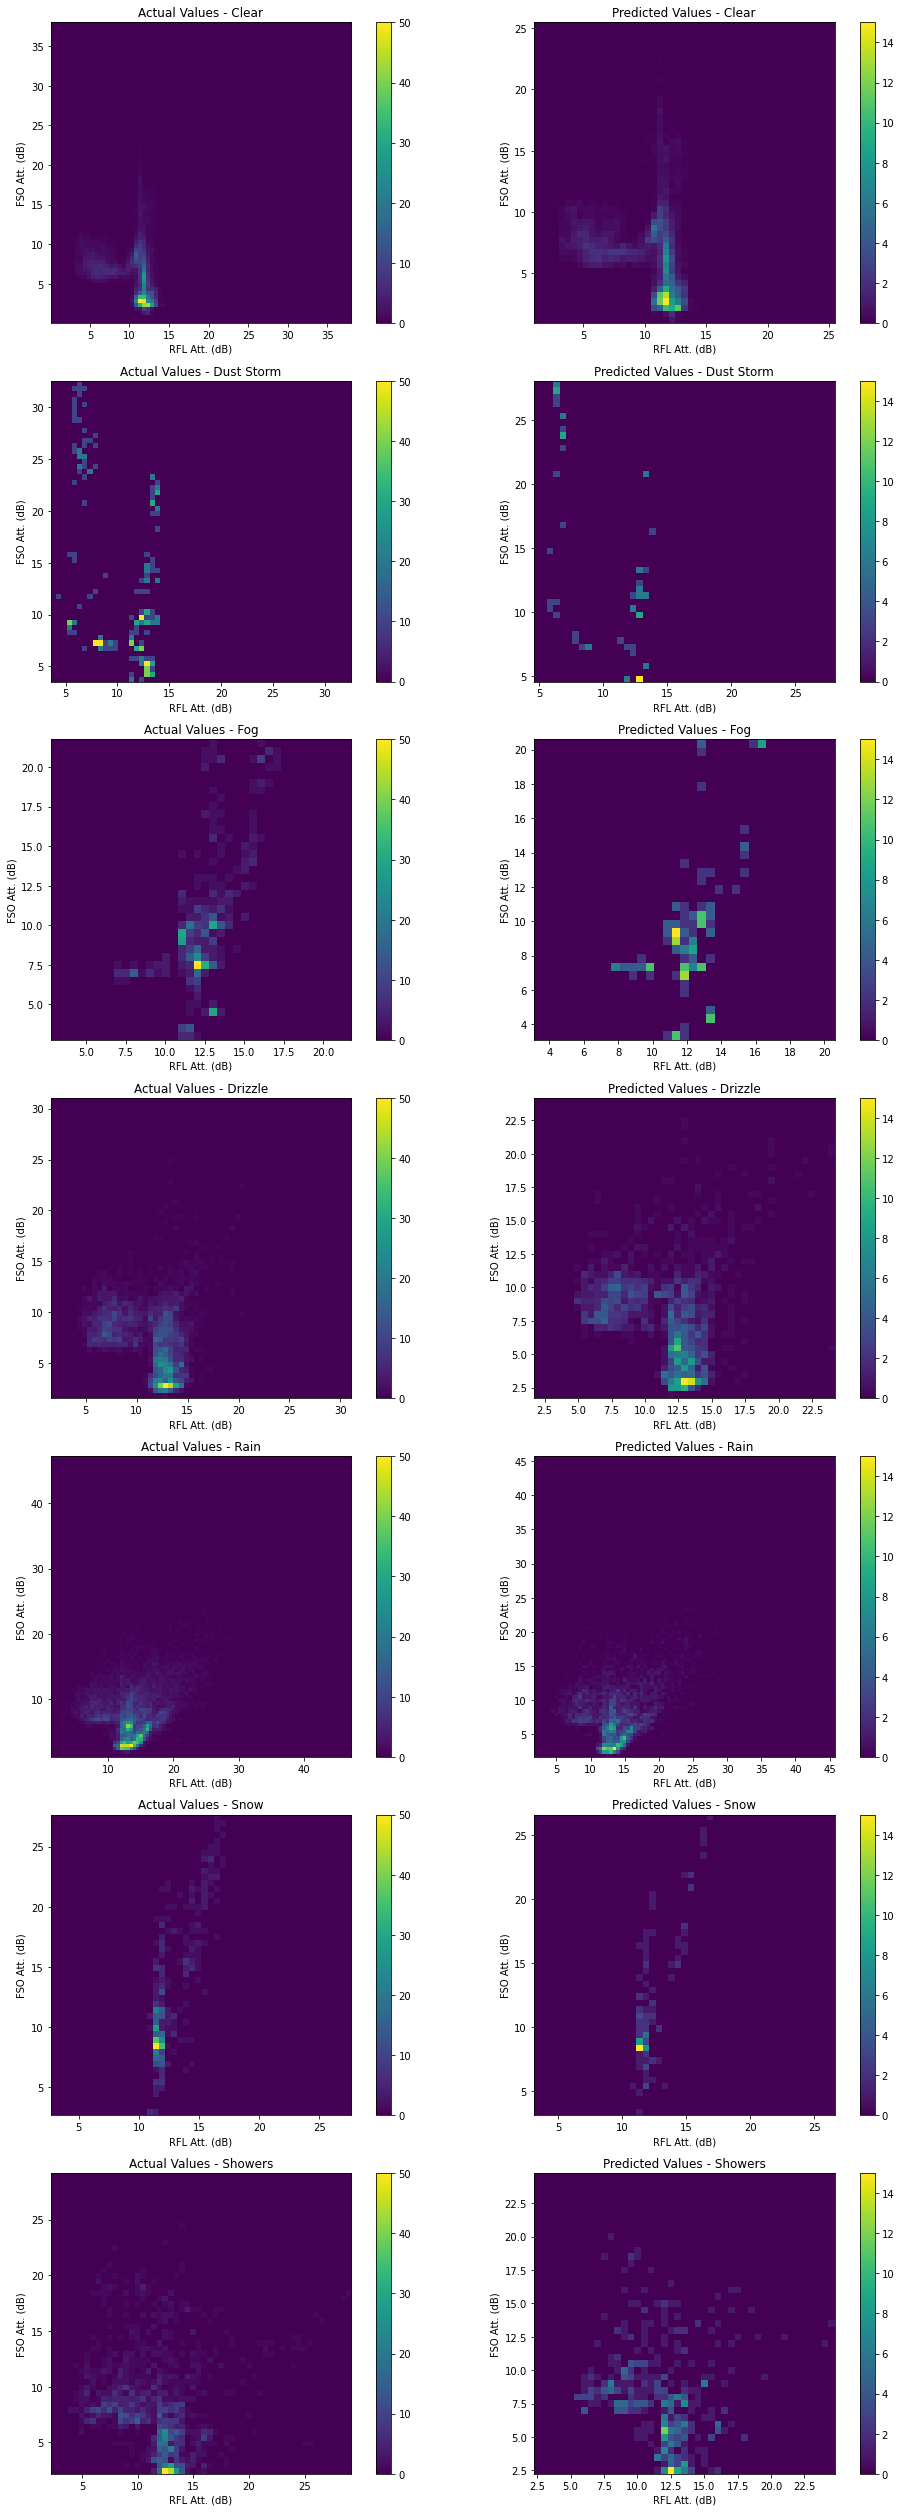

In [16]:
# Define the list of SYNOP code columns
synop_columns = ['SYNOP_0', 'SYNOP_3', 'SYNOP_4', 'SYNOP_5', 'SYNOP_6', 'SYNOP_7', 'SYNOP_8']

# Create a figure to display heatmaps for each SYNOP code column
fig, axs = plt.subplots(len(synop_columns), 2, figsize=(14, 5*len(synop_columns)))

# Iterate over each SYNOP code column
for i, synop_column in enumerate(synop_columns):
    # Filter the dataset where SYNOP code column has a value of 1
    data_copy = data.copy()
    subset = data_copy[data_copy[synop_column] == 1]

    # Check if there are any rows for the specific SYNOP code
    if len(subset) == 0:
        print(f"No data for SYNOP {synop_column.replace('SYNOP_', '')}")
        continue
        
    # Split the subset into training and testing data
    X = subset.drop(['RFL_Att', 'FSO_Att'], axis=1)  
    y_rfl = subset['RFL_Att']
    y_fso = subset['FSO_Att']
    X_train, X_test, y_rfl_train, y_rfl_test, y_fso_train, y_fso_test = train_test_split(
    X, y_rfl, y_fso, test_size=0.3, random_state=42)
    
    
    # Create and train Random Forest models for RFL_Att and FSO_Att
    model_rfl = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)  
    model_rfl.fit(X_train, y_rfl_train)

    model_fso = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model_fso.fit(X_train, y_fso_train)

    # Predict the values
    predicted_rfl = model_rfl.predict(X_test)
    predicted_fso = model_fso.predict(X_test)
    
    # Store the results for the SYNOP value
    if synop_column == 'SYNOP_0':
        synop_name = 'Clear'
        
    elif synop_column == 'SYNOP_3':
        synop_name = 'Dust Storm'
        
    elif synop_column == 'SYNOP_4':
        synop_name = 'Fog'
    
    elif synop_column == 'SYNOP_5':
        synop_name = 'Drizzle'
        
    elif synop_column == 'SYNOP_6':
        synop_name = 'Rain'
        
    elif synop_column == 'SYNOP_7':
        synop_name = 'Snow'
        
    elif synop_column == 'SYNOP_8':
        synop_name = 'Showers'

    # Create heatmaps for actual and predicted values side by side
    im_actual = create_heatmap(subset[['RFL_Att', 'FSO_Att']], f'Actual Values - {synop_name}', axs[i, 0])
    im_predicted = create_heatmap({'RFL_Att': predicted_rfl, 'FSO_Att': predicted_fso}, f'Predicted Values - {synop_name}', axs[i, 1])
    
    # Set x-axis and y-axis labels
    axs[i, 0].set_xlabel('RFL Att. (dB)')
    axs[i, 0].set_ylabel('FSO Att. (dB)')
    axs[i, 1].set_xlabel('RFL Att. (dB)')
    axs[i, 1].set_ylabel('FSO Att. (dB)')
    
    
# Add colorbars to the heatmaps
for i in range(len(synop_columns)):
    fig.colorbar(im_actual, ax=axs[i, 0])
    fig.colorbar(im_predicted, ax=axs[i, 1])

plt.tight_layout()
plt.show()


### Trying 

In [17]:
from scipy.stats import pearsonr, entropy

corr_coeff, _ = pearsonr(predicted_rfl, predicted_fso)
entropy_rfl = entropy(predicted_rfl)
entropy_fso = entropy(predicted_fso)
total_entropy = entropy_rfl + entropy_fso

In [18]:
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import pearsonr, entropy
from sklearn.metrics import mutual_info_score

-0.2823114079792717


/Users/trushaparam/miniforge3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


-0.6226654844100586


/Users/trushaparam/miniforge3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.5710857694054257


/Users/trushaparam/miniforge3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


-0.2048358619058393


/Users/trushaparam/miniforge3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.3446947196808042


/Users/trushaparam/miniforge3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.7966534971066105


/Users/trushaparam/miniforge3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


-0.19634374221656767


/Users/trushaparam/miniforge3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


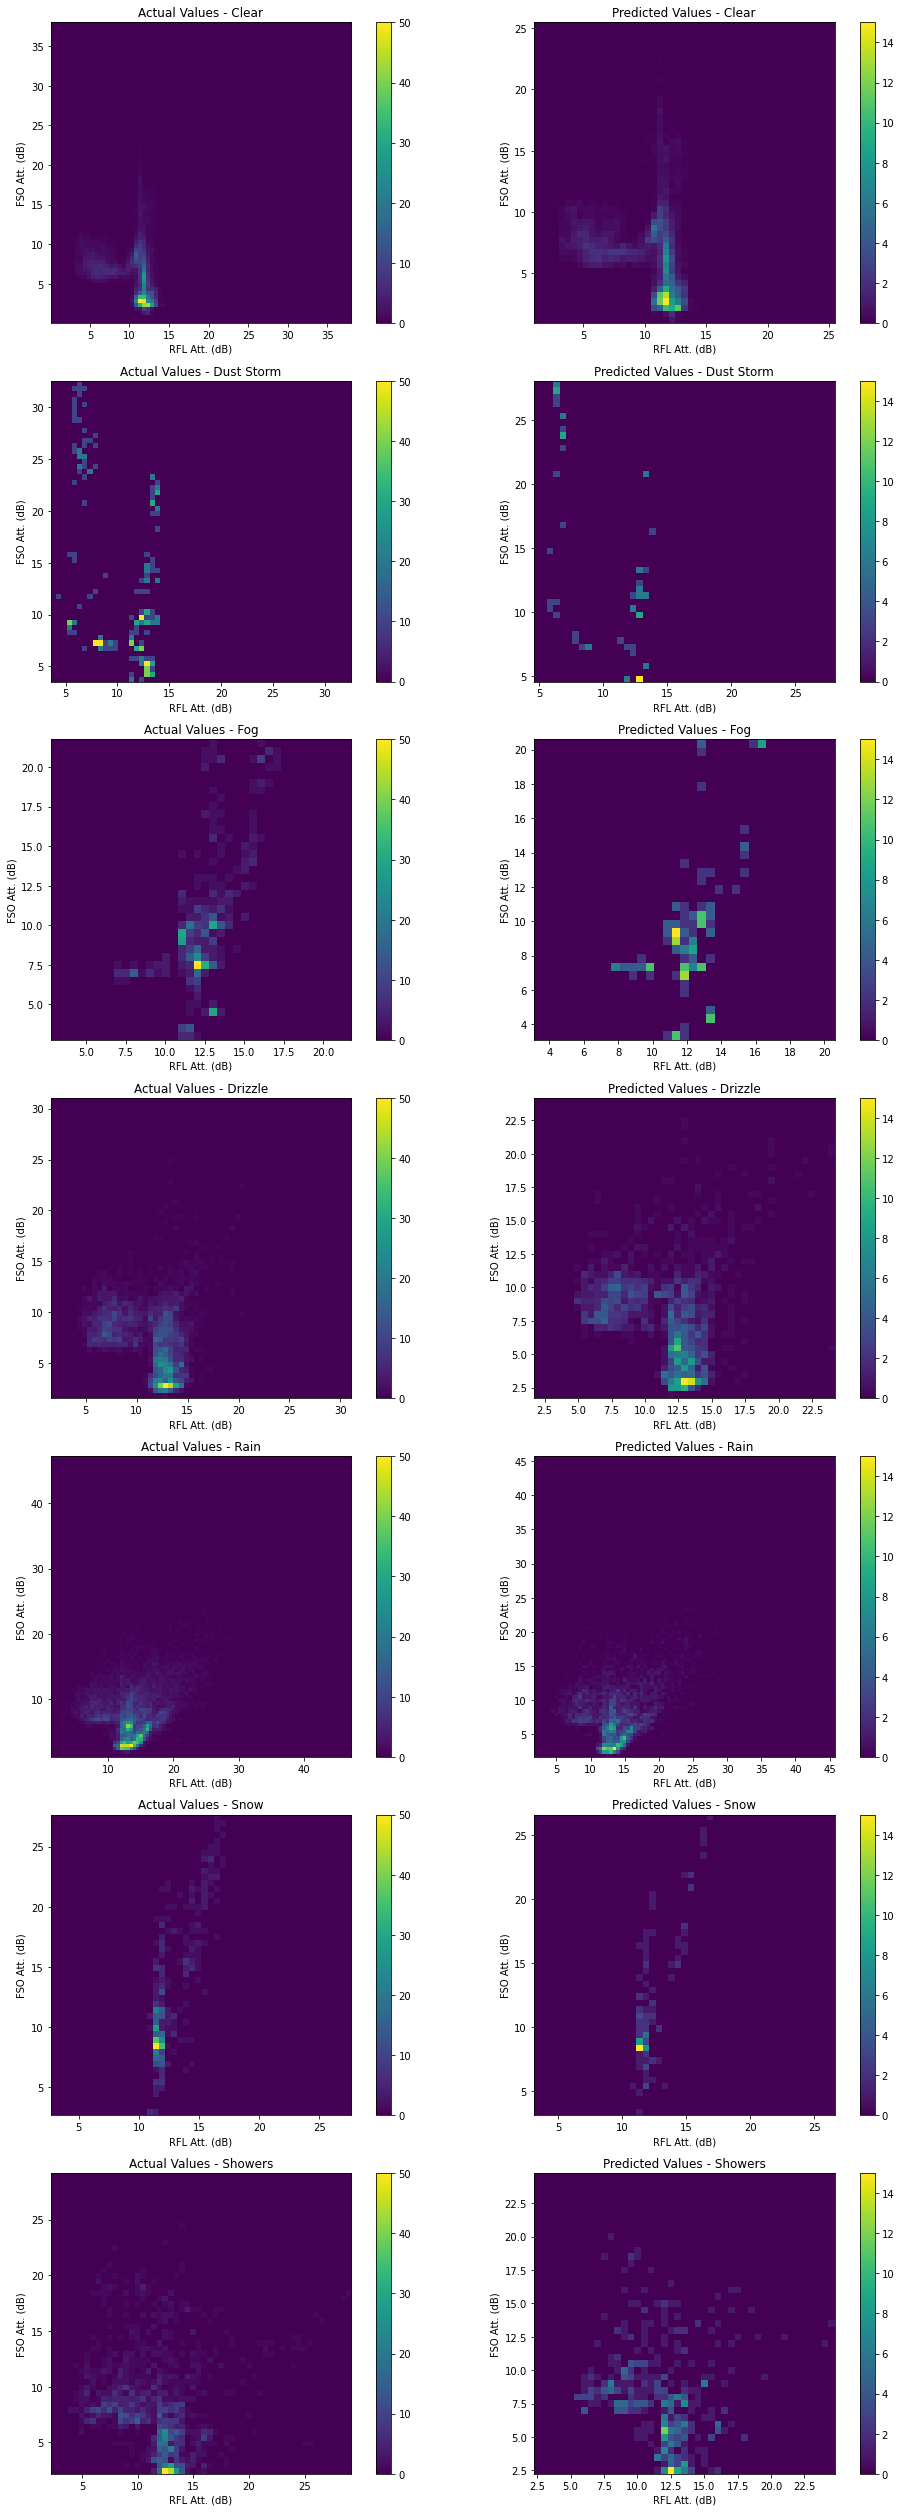

In [19]:
# Define the list of SYNOP code columns
synop_columns = ['SYNOP_0', 'SYNOP_3', 'SYNOP_4', 'SYNOP_5', 'SYNOP_6', 'SYNOP_7', 'SYNOP_8']

# Create a figure to display heatmaps for each SYNOP code column
fig, axs = plt.subplots(len(synop_columns), 2, figsize=(14, 5*len(synop_columns)))

pearson_coefficients = []
i_over_h_ratios = []

# Iterate over each SYNOP code column
for i, synop_column in enumerate(synop_columns):
    # Filter the dataset where SYNOP code column has a value of 1
    data_copy = data.copy()
    subset = data_copy[data_copy[synop_column] == 1]

    # Check if there are any rows for the specific SYNOP code
    if len(subset) == 0:
        print(f"No data for SYNOP {synop_column.replace('SYNOP_', '')}")
        continue
        
    # Split the subset into training and testing data
    X = subset.drop(['RFL_Att', 'FSO_Att'], axis=1)  
    y_rfl = subset['RFL_Att']
    y_fso = subset['FSO_Att']
    X_train, X_test, y_rfl_train, y_rfl_test, y_fso_train, y_fso_test = train_test_split(
    X, y_rfl, y_fso, test_size=0.3, random_state=42)
    
    
    # Create and train Random Forest models for RFL_Att and FSO_Att
    model_rfl = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)  
    model_rfl.fit(X_train, y_rfl_train)

    model_fso = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model_fso.fit(X_train, y_fso_train)

    # Predict the values
    predicted_rfl = model_rfl.predict(X_test)
    predicted_fso = model_fso.predict(X_test)
    
    # Store the results for the SYNOP value
    if synop_column == 'SYNOP_0':
        synop_name = 'Clear'
        
    elif synop_column == 'SYNOP_3':
        synop_name = 'Dust Storm'
        
    elif synop_column == 'SYNOP_4':
        synop_name = 'Fog'
    
    elif synop_column == 'SYNOP_5':
        synop_name = 'Drizzle'
        
    elif synop_column == 'SYNOP_6':
        synop_name = 'Rain'
        
    elif synop_column == 'SYNOP_7':
        synop_name = 'Snow'
        
    elif synop_column == 'SYNOP_8':
        synop_name = 'Showers'
        
    # Calculate Pearson coefficient
    corr_coeff, _ = pearsonr(predicted_rfl, predicted_fso)
    print(corr_coeff)
    
    # Store the results for the SYNOP value
    pearson_coefficients.append(corr_coeff)

    # Calculate Mutual Information and Entropy
#     mi_rfl = mutual_info_regression(X_test, predicted_rfl)
#     mi_fso = mutual_info_regression(X_test, predicted_fso)
    
    # Convert predicted values to probability distributions
    prob_rfl = predicted_rfl / np.sum(predicted_rfl)
    prob_fso = predicted_fso / np.sum(predicted_fso)

    # Calculate entropy
#     entropy_rfl = entropy(prob_rfl)
#     entropy_fso = entropy(prob_fso)
    
    entropy_rfl = entropy(predicted_rfl)
#     print(entropy_rfl)
    entropy_fso = entropy(predicted_fso)
#     print(entropy_fso)

#     mutual_information = np.sum(mi_rfl) + np.sum(mi_fso)
    mutual_information = mutual_info_score(predicted_rfl, predicted_fso)
    total_entropy = entropy_rfl + entropy_fso

    i_over_h = mutual_information / total_entropy
    i_over_h_ratios.append(i_over_h)

    # Create heatmaps for actual and predicted values side by side
    im_actual = create_heatmap(subset[['RFL_Att', 'FSO_Att']], f'Actual Values - {synop_name}', axs[i, 0])
    im_predicted = create_heatmap({'RFL_Att': predicted_rfl, 'FSO_Att': predicted_fso}, f'Predicted Values - {synop_name}', axs[i, 1])
    
    # Set x-axis and y-axis labels
    axs[i, 0].set_xlabel('RFL Att. (dB)')
    axs[i, 0].set_ylabel('FSO Att. (dB)')
    axs[i, 1].set_xlabel('RFL Att. (dB)')
    axs[i, 1].set_ylabel('FSO Att. (dB)')
    
    
# Add colorbars to the heatmaps
for i in range(len(synop_columns)):
    fig.colorbar(im_actual, ax=axs[i, 0])
    fig.colorbar(im_predicted, ax=axs[i, 1])

plt.tight_layout()
plt.show()


/Users/trushaparam/miniforge3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/trushaparam/miniforge3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/trushaparam/miniforge3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/trushaparam/miniforge3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and

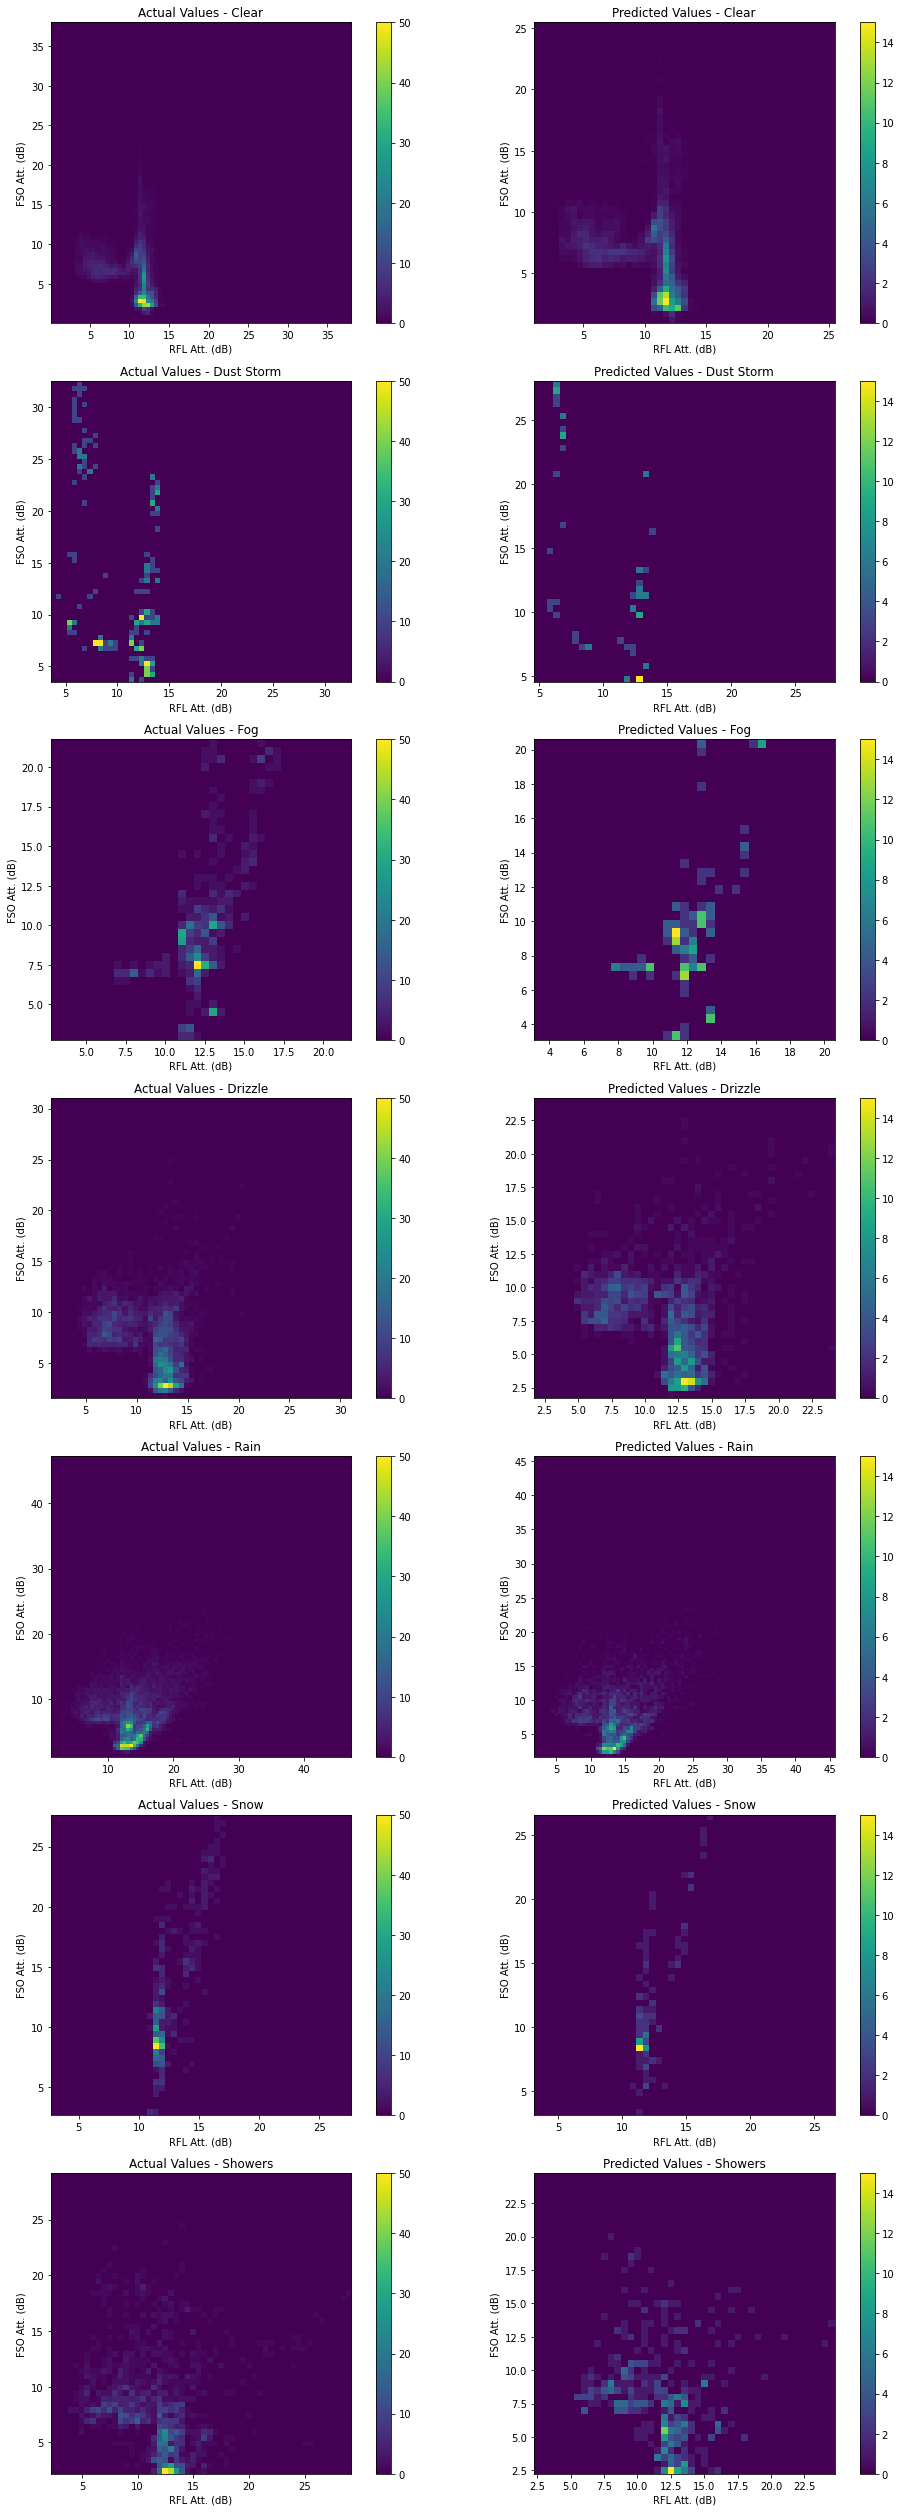

In [21]:
# Define the list of SYNOP code columns
synop_columns = ['SYNOP_0', 'SYNOP_3', 'SYNOP_4', 'SYNOP_5', 'SYNOP_6', 'SYNOP_7', 'SYNOP_8']

# Create a figure to display heatmaps for each SYNOP code column
fig, axs = plt.subplots(len(synop_columns), 2, figsize=(14, 5*len(synop_columns)))

pearson_coefficients = []
i_over_h_ratios = []

# Iterate over each SYNOP code column
for i, synop_column in enumerate(synop_columns):
    # Filter the dataset where SYNOP code column has a value of 1
    data_copy = data.copy()
    subset = data_copy[data_copy[synop_column] == 1]

    # Check if there are any rows for the specific SYNOP code
    if len(subset) == 0:
        print(f"No data for SYNOP {synop_column.replace('SYNOP_', '')}")
        continue
        
    # Split the subset into training and testing data
    X = subset.drop(['RFL_Att', 'FSO_Att'], axis=1)  
    y_rfl = subset['RFL_Att']
    y_fso = subset['FSO_Att']
    X_train, X_test, y_rfl_train, y_rfl_test, y_fso_train, y_fso_test = train_test_split(
    X, y_rfl, y_fso, test_size=0.3, random_state=42)
    
    
    # Create and train Random Forest models for RFL_Att and FSO_Att
    model_rfl = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)  
    model_rfl.fit(X_train, y_rfl_train)

    model_fso = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model_fso.fit(X_train, y_fso_train)

    # Predict the values
    predicted_rfl = model_rfl.predict(X_test)
    predicted_fso = model_fso.predict(X_test)
    
    # Store the results for the SYNOP value
    if synop_column == 'SYNOP_0':
        synop_name = 'Clear'
        
    elif synop_column == 'SYNOP_3':
        synop_name = 'Dust Storm'
        
    elif synop_column == 'SYNOP_4':
        synop_name = 'Fog'
    
    elif synop_column == 'SYNOP_5':
        synop_name = 'Drizzle'
        
    elif synop_column == 'SYNOP_6':
        synop_name = 'Rain'
        
    elif synop_column == 'SYNOP_7':
        synop_name = 'Snow'
        
    elif synop_column == 'SYNOP_8':
        synop_name = 'Showers'
        
    # Calculate Pearson coefficient
    corr_coeff, _ = pearsonr(y_rfl_test, y_fso_test)
#     print(corr_coeff)
    
    # Store the results for the SYNOP value
    pearson_coefficients.append(corr_coeff)

    # Calculate Mutual Information and Entropy
#     mi_rfl = mutual_info_regression(X_test, predicted_rfl)
#     mi_fso = mutual_info_regression(X_test, predicted_fso)
    
    # Convert predicted values to probability distributions
    prob_rfl = y_rfl_test / np.sum(y_rfl_test)
    prob_fso = y_fso_test / np.sum(y_fso_test)

    # Calculate entropy
#     entropy_rfl = entropy(prob_rfl)
#     entropy_fso = entropy(prob_fso)
    
    entropy_rfl = entropy(y_rfl_test)
#     print(entropy_rfl)
    entropy_fso = entropy(y_fso_test)
#     print(entropy_fso)

#     mutual_information = np.sum(mi_rfl) + np.sum(mi_fso)
    mutual_information = mutual_info_score(y_rfl_test, y_fso_test)
    total_entropy = entropy_rfl + entropy_fso

    i_over_h = mutual_information / total_entropy
    i_over_h_ratios.append(i_over_h)

    # Create heatmaps for actual and predicted values side by side
    im_actual = create_heatmap(subset[['RFL_Att', 'FSO_Att']], f'Actual Values - {synop_name}', axs[i, 0])
    im_predicted = create_heatmap({'RFL_Att': predicted_rfl, 'FSO_Att': predicted_fso}, f'Predicted Values - {synop_name}', axs[i, 1])
    
    # Set x-axis and y-axis labels
    axs[i, 0].set_xlabel('RFL Att. (dB)')
    axs[i, 0].set_ylabel('FSO Att. (dB)')
    axs[i, 1].set_xlabel('RFL Att. (dB)')
    axs[i, 1].set_ylabel('FSO Att. (dB)')
    
    
# Add colorbars to the heatmaps
for i in range(len(synop_columns)):
    fig.colorbar(im_actual, ax=axs[i, 0])
    fig.colorbar(im_predicted, ax=axs[i, 1])

plt.tight_layout()
plt.show()


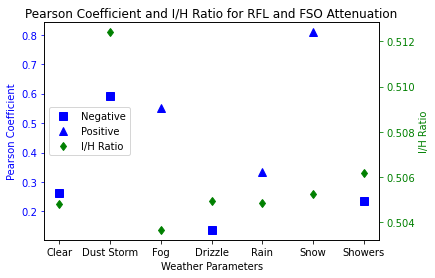

In [22]:
### TEST

import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined pearson_coefficients and i_over_h_ratios

# Plotting
fig, ax1 = plt.subplots()

# Modify negative values to their absolute values
abs_pearson_coefficients = [abs(val) for val in pearson_coefficients]

# Plot Pearson coefficient on the left y-axis
negative_indices = [i for i, val in enumerate(pearson_coefficients) if val < 0]
positive_indices = [i for i, val in enumerate(pearson_coefficients) if val >= 0]

# Plot squares for negative values
line1, = ax1.plot(negative_indices, [abs_pearson_coefficients[i] for i in negative_indices], 'bs', markersize=8, label='Absolute Value')

# Plot triangles for positive values
line2, = ax1.plot(positive_indices, [pearson_coefficients[i] for i in positive_indices], 'b^', markersize=8, label='Positive')

ax1.set_xlabel('Weather Parameters')
ax1.set_ylabel('Pearson Coefficient', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis for the I/H ratio
ax2 = ax1.twinx()
synop_names = ['Clear', 'Dust Storm', 'Fog', 'Drizzle', 'Rain', 'Snow', 'Showers']
line3, = ax2.plot(synop_names, i_over_h_ratios, 'gd-', label='I/H Ratio')
ax2.set_ylabel('I/H Ratio', color='g')
ax2.tick_params('y', colors='g')

# Remove the line connecting points
ax1.lines[0].set_linestyle("")
ax2.lines[0].set_linestyle("")

# Combine legend handles and labels
lines = [line1, line2, line3]
labels = ['Negative', 'Positive', 'I/H Ratio']

# Show the single legend
plt.legend(lines, labels, loc='center left')

# Show the plot
plt.title('Pearson Coefficient and I/H Ratio for RFL and FSO Attenuation')
plt.show()


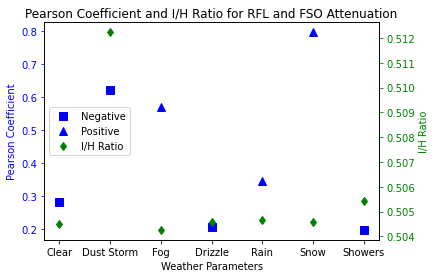

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined pearson_coefficients and i_over_h_ratios

# Plotting
fig, ax1 = plt.subplots()

# Modify negative values to their absolute values
abs_pearson_coefficients = [abs(val) for val in pearson_coefficients]

# Plot Pearson coefficient on the left y-axis
negative_indices = [i for i, val in enumerate(pearson_coefficients) if val < 0]
positive_indices = [i for i, val in enumerate(pearson_coefficients) if val >= 0]

# Plot squares for negative values
line1, = ax1.plot(negative_indices, [abs_pearson_coefficients[i] for i in negative_indices], 'bs', markersize=8, label='Absolute Value')

# Plot triangles for positive values
line2, = ax1.plot(positive_indices, [pearson_coefficients[i] for i in positive_indices], 'b^', markersize=8, label='Positive')

ax1.set_xlabel('Weather Parameters')
ax1.set_ylabel('Pearson Coefficient', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis for the I/H ratio
ax2 = ax1.twinx()
synop_names = ['Clear', 'Dust Storm', 'Fog', 'Drizzle', 'Rain', 'Snow', 'Showers']
line3, = ax2.plot(synop_names, i_over_h_ratios, 'gd-', label='I/H Ratio')
ax2.set_ylabel('I/H Ratio', color='g')
ax2.tick_params('y', colors='g')

# Remove the line connecting points
ax1.lines[0].set_linestyle("")
ax2.lines[0].set_linestyle("")

# Combine legend handles and labels
lines = [line1, line2, line3]
labels = ['Negative', 'Positive', 'I/H Ratio']

# Show the single legend
plt.legend(lines, labels, loc='center left')

# Show the plot
plt.title('Pearson Coefficient and I/H Ratio for RFL and FSO Attenuation')
plt.show()
